In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('car_data.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Data Cleaning

In [4]:
data = raw_data.drop(['Model'],axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


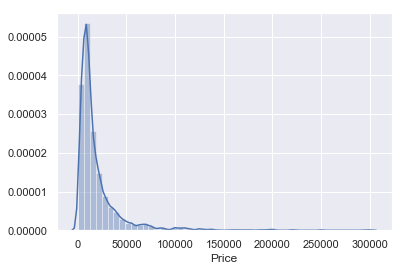

In [8]:
sns.distplot(data_no_mv['Price'])

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price']<q]
data1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


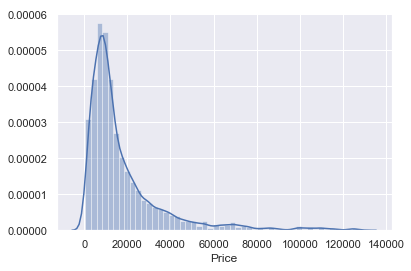

In [10]:
sns.distplot(data1['Price'])

In [11]:
data2 = data1[data1['EngineV']<6.5]
data2.describe()

,Price,Mileage,EngineV,Year
count,3961.000000,3961.000000,3961.000000,3961.000000
mean,17890.545307,164.935370,2.442704,2006.308255
std,19009.523529,102.848849,0.944481,6.673304
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,93.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,21200.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,6.300000,2016.000000


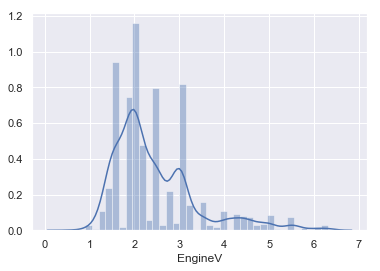

In [12]:
sns.distplot(data2['EngineV'])

In [13]:
q = data2['Year'].quantile(0.01)
data3 = data2[data2['Year']>q]
data3.describe()

,Price,Mileage,EngineV,Year
count,3905.000000,3905.000000,3905.000000,3905.000000
mean,18100.297083,164.107298,2.449795,2006.620487
std,19056.178291,102.377608,0.947793,6.173623
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,92.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2008.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,129222.000000,980.000000,6.300000,2016.000000


In [14]:
q = data3['Mileage'].quantile(0.99)
data4 = data3[data3['Mileage']<q]
data4.describe()

,Price,Mileage,EngineV,Year
count,3865.000000,3865.000000,3865.000000,3865.000000
mean,18201.438580,160.401035,2.450259,2006.716171
std,19088.279971,95.455403,0.949535,6.099113
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,432.000000,6.300000,2016.000000


In [15]:
data_cleaned = data4.reset_index(drop=True)

# #OLS Assumption

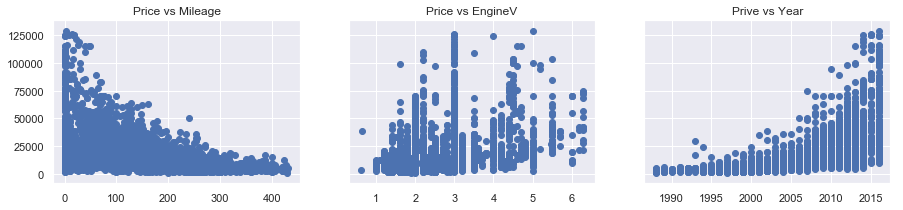

In [16]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Price vs Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Prive vs Year')

plt.show()

In [17]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3860,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3861,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3862,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3863,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


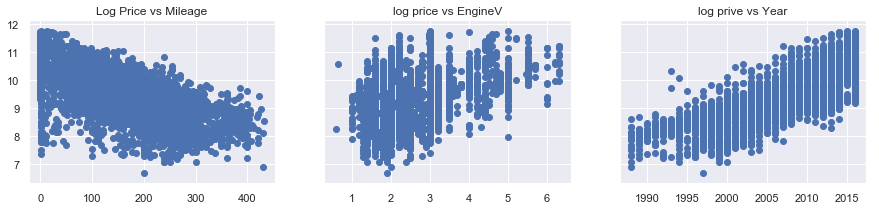

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log price'])
ax1.set_title('Log Price vs Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log price'])
ax2.set_title('log price vs EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['log price'])
ax3.set_title('log prive vs Year')

plt.show()

In [19]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3860,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3861,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3862,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3863,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


##    Multicollinearity

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

NameError: name 'data_cleaned' is not defined

In [21]:
data_no_multi = data_cleaned.drop(['Year'],axis=1)
data_no_multi

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3860,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3861,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3862,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3863,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


    Dummy variables

In [41]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first=True)
data_with_dummies.head()  #drop first drop the first variable (here Audi)

,Price,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Rearranging

In [23]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [24]:
cols = ['log price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [25]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regresssion

In [26]:
target = data_preprocessed['log price']
inputs = data_preprocessed.drop(['log price'], axis=1)

In [27]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
input_scaled = scaler.transform(inputs)
input_scaled

array([[ 1.22166004, -0.47424997,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [ 2.79327781,  0.47370493, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [ 2.07033364,  2.6855997 , -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       ...,
       [-1.58629705,  0.57903325, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [-1.67011666,  1.10567486,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [-0.38139009, -0.47424997, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525]])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, target, test_size=0.2, random_state = 365)

In [30]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_hat = reg.predict(x_train)

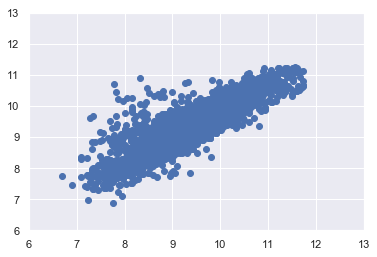

In [32]:
plt.scatter(y_train, y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.
plt.show()

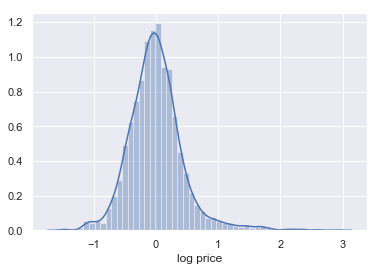

In [33]:
#residual Plot
sns.distplot(y_hat - y_train)

In [34]:
reg.score(x_train, y_train)

0.7462354287441848

# Testing

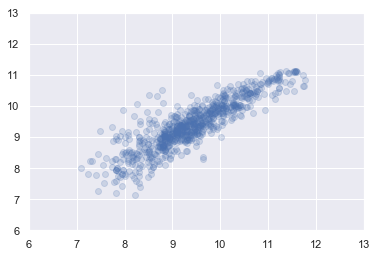

In [39]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()